In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### Constructing data set

In [3]:
def synthetic_data(w, b, num_exmples):
    """Create y = Xw + b + noise"""
    x = torch.normal(0, 1, (num_exmples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print("features:",features[0],"\nlabel:",labels[0])

features: tensor([0.6800, 0.9661]) 
label: tensor([2.2713])


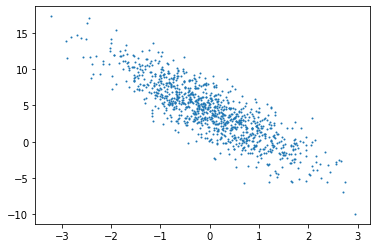

In [5]:
from torch import detach
import matplotlib.pyplot as plt

plt.scatter(features[:, 1].detach().numpy(),labels.detach().numpy(), 1)

### Little batch sample

In [6]:
def data_iter(batch_size, featrues, labels):
    num_exmples = len(features)
    indices = list(range(num_exmples))

    random.shuffle(indices)
    for i in range(0, num_exmples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_exmples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tensor([[-0.5622, -1.5402],
        [-0.7106,  1.4742],
        [ 1.2803,  0.8483],
        [ 2.4719,  0.4435],
        [ 1.4811,  0.1596],
        [-1.6567, -0.5006],
        [-1.0351,  0.7833],
        [-0.5502,  0.0600],
        [-0.2939,  1.4671],
        [-0.0495,  0.8540]]) 
 tensor([[ 8.3237],
        [-2.2287],
        [ 3.8828],
        [ 7.6440],
        [ 6.6169],
        [ 2.5853],
        [-0.5343],
        [ 2.9050],
        [-1.3744],
        [ 1.2017]])


### Model

In [7]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(x, w, b):
    """Linear Regression"""
    return torch.matmul(x, w) + b

### Lose

In [8]:
def squared_loss(y_hat, y):
    """mean square loss"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

### Optimization algorithm

In [9]:
def sgd(params, lr, batch_size):

    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.036387
epoch 2, loss 0.000137
epoch 3, loss 0.000048


In [12]:
print(f'w\'s evaluated error = {true_w - w.reshape(true_w.shape)}')
print(f'b\'s evaluated error = {true_b - b}')

w's evaluated error = tensor([-0.0003, -0.0011], grad_fn=<SubBackward0>)
b's evaluated error = tensor([-3.9101e-05], grad_fn=<RsubBackward1>)
